# Análisis del sensor IR sharp GP2Y0A710K0F

## Pruebas a distancia fija

Descripción: se realizaron un conjunto de pruebas fijando el sensor a una distancia de 100 cm de la pared. En las pruebas sucesivas se han variado los siguientes parámetros: 

- **Fuente de alimentación:** batería de 6v, 12v y AC (transformador a USB)
- **Frecuencia de muestreo:** 1 Hz, 1/60 Hz, 10 Hz
- **Sensor:** original y modificado agregando un filtro pasa bajos 
- **Longitud de cables:** longitud de cables entre el sensor y la placa controladorea.

![Image of Yaktocat](img/dos.jpg)

### Prueba 01

- Power: bateria 6v
- Freq: 1 Hz (se usó la función **delay()** para determinar el período T)
- Cables: 15 cm

In [1]:
import pandas as pd
from pandas.tools.plotting import bootstrap_plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

/home/emiliano/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


(array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.]), <a list of 8 Text xticklabel objects>)

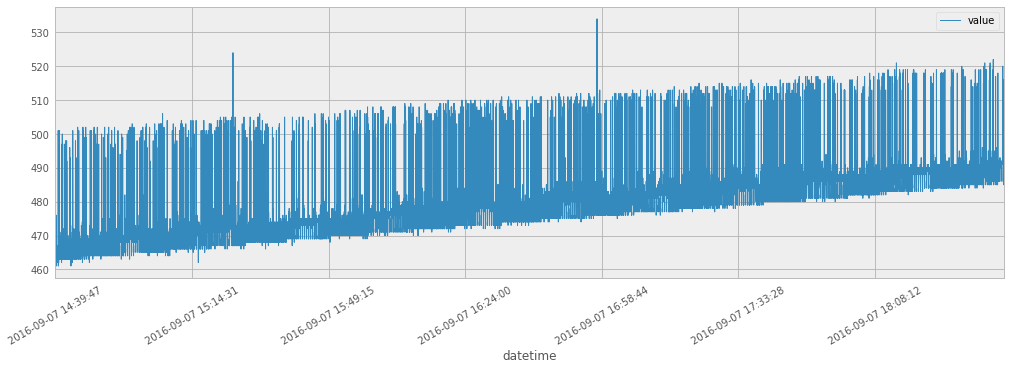

In [2]:
data = pd.read_csv('prueba01/prueba01.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']
data = data.set_index('datetime')
#data['value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [91]:
data['value'].describe()

count    13890.000000
mean       480.203240
std         10.231623
min        461.000000
25%        473.000000
50%        479.000000
75%        485.000000
max        534.000000
dtype: float64

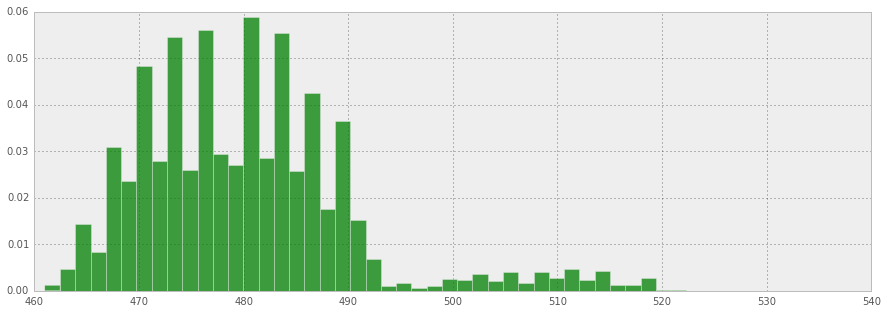

In [92]:
n, bins, patches = plt.hist(data['value'], 50, normed=1, facecolor='green', alpha=0.75)

### Prueba 02

- Power: AC x USB
- Freq: 1/min
- Cables: 15 cm

(array([    0.,   200.,   400.,   600.,   800.,  1000.]),
 <a list of 6 Text xticklabel objects>)

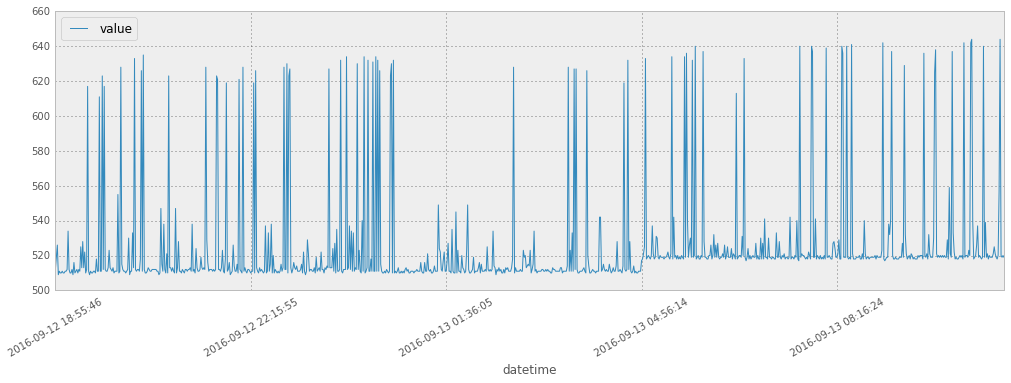

In [93]:
#from datetime import datetime
#data = pd.read_csv('prueba02/prueba02.csv', dtype={'datetime':datetime,'dist':'S64','value':'S64'},parse_dates=[0],infer_datetime_format=True)
#data.columns
#data.datetime

data = pd.read_csv('prueba02/prueba02.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']
data = data.set_index('datetime')
data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [94]:
data['value'].describe()

count    972.000000
mean     524.627572
std       30.445731
min      509.000000
25%      511.000000
50%      516.000000
75%      520.000000
max      644.000000
dtype: float64

##### Histograma

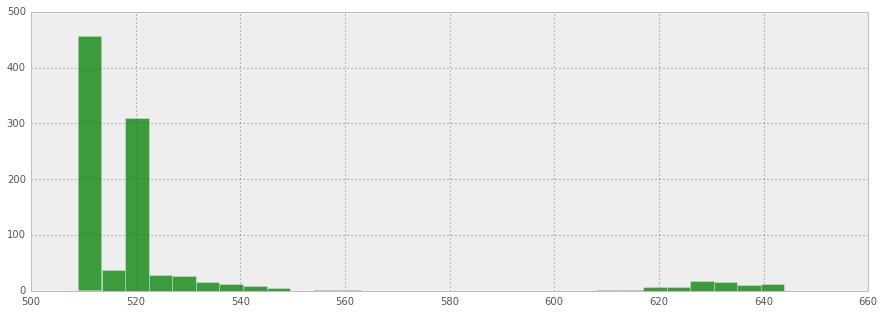

In [95]:
n, bins, patches = plt.hist(data['value'],30, facecolor='green', alpha=0.75)

##### Media móvil

(array([    0.,   200.,   400.,   600.,   800.,  1000.]),
 <a list of 6 Text xticklabel objects>)

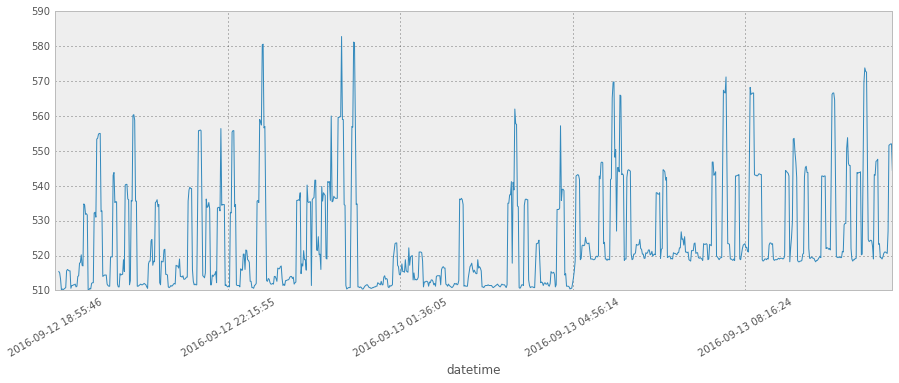

In [96]:
pd.rolling_mean(data['value'],window=5).plot()
plt.xticks(rotation=30)

### Prueba 03

- Power: bateria 12v
- Freq: 1/min
- Cables: 15 cm

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text xticklabel objects>)

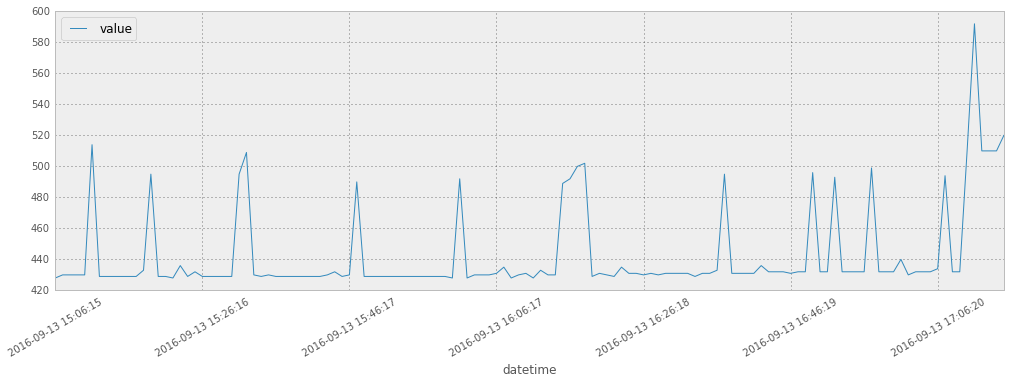

In [97]:
data = pd.read_csv('prueba03/prueba03.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']
data = data.set_index('datetime')
data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [98]:
data['value'].describe()

count    130.000000
mean     442.546154
std       28.923345
min      428.000000
25%      429.000000
50%      431.000000
75%      432.000000
max      592.000000
dtype: float64

##### Histograma

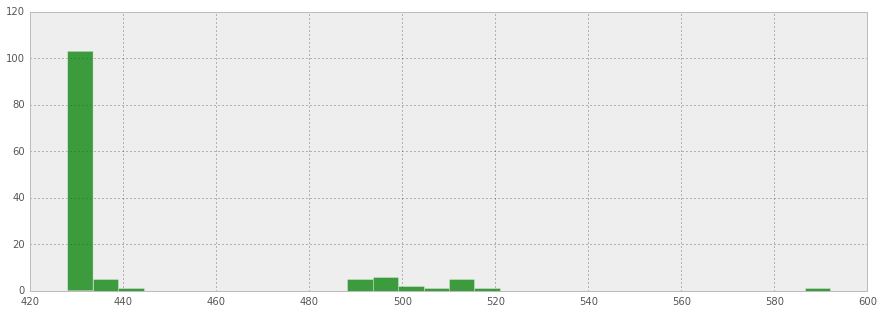

In [99]:
n, bins, patches = plt.hist(data['value'],30, facecolor='green', alpha=0.75)

##### Media móvil

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text xticklabel objects>)

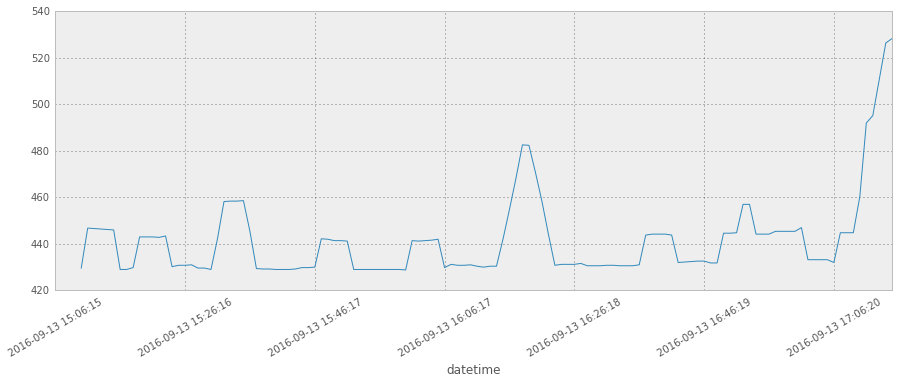

In [100]:
pd.rolling_mean(data['value'],window=5).plot()
plt.xticks(rotation=30)

### Prueba 04

- Power: bateria 12v
    - Inicio: 12.6
    - Fin: 12.19
- Freq: 1/min
- Cables: 15 cm
- Inicio: 2016-09-13 17:21
- Fin: 2016-09-14 8:20


(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 7 Text xticklabel objects>)

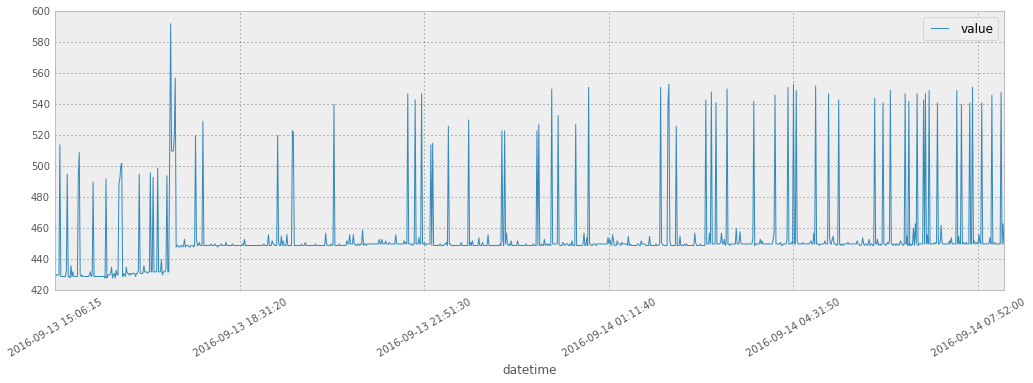

In [101]:
data = pd.read_csv('prueba04/prueba04.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']
data = data.set_index('datetime')
data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [102]:
data['value'].describe()

count    1029.000000
mean      453.860058
std        23.200024
min       428.000000
25%       449.000000
50%       450.000000
75%       450.000000
max       592.000000
dtype: float64

##### Histograma

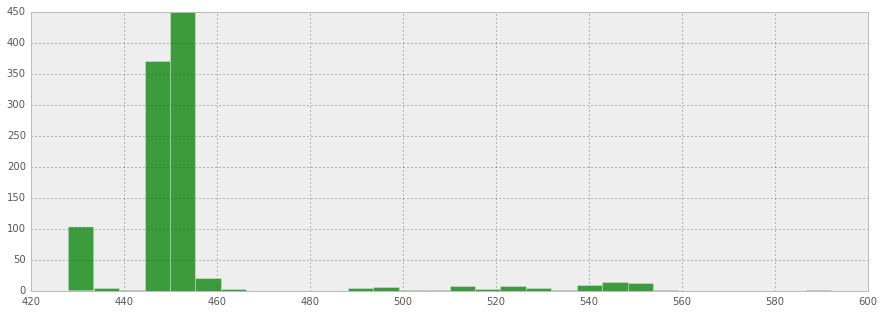

In [103]:
n, bins, patches = plt.hist(data['value'],30, facecolor='green', alpha=0.75)

##### Media móvil

(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 7 Text xticklabel objects>)

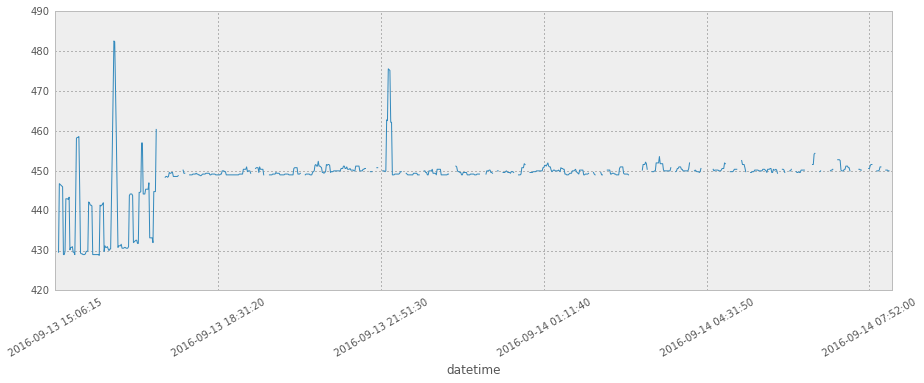

In [104]:
pd.rolling_mean(data[data<520]['value'],window=5).plot()
plt.xticks(rotation=30)

### Prueba 05

- Power: bateria 12v
    - Inicio: 12.19
    - Fin: 12.18
- Freq: 10 Hz (T: 100 ms)
- Cables: 15 cm
- Inicio: 2016-09-14 8:44
- Fin: 2016-09-14 12:07

In [105]:
data = pd.read_csv('prueba05/prueba05.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']
#data = data.set_index('datetime')
#data[data<519].plot(figsize=(17,5),ylim=(515,520))
data.plot(figsize=(17,5))
plt.xticks(rotation=30)

(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,
         120000.,  140000.]), <a list of 8 Text xticklabel objects>)

#### Estadísticos

In [106]:
data['value'].describe()

count    121054.000000
mean        519.126762
std           4.747987
min         492.000000
25%         518.000000
50%         518.000000
75%         518.000000
max         574.000000
dtype: float64

##### Histograma

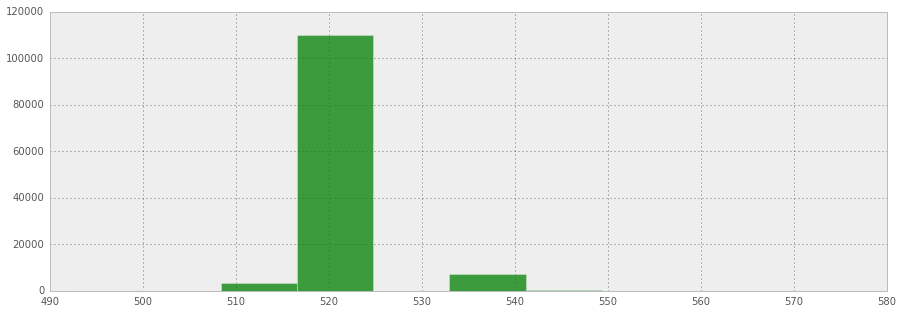

In [107]:
n, bins, patches = plt.hist(data['value'],10, facecolor='green', alpha=0.75)
#data['value']

##### Media móvil

(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,
         120000.,  140000.]), <a list of 8 Text xticklabel objects>)

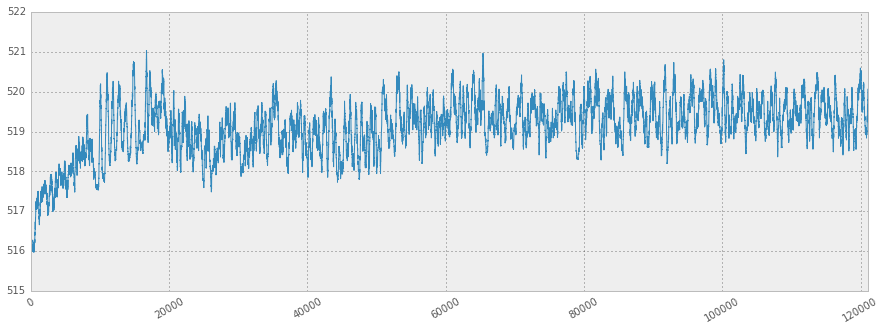

In [108]:
pd.rolling_mean(data['value'],window=250).plot()
plt.xticks(rotation=30)

### Prueba 06

- Power: bateria 12v
    - Inicio: 12.19
    - Fin: 
- Freq: 1/60 Hz (T: 1 min)
- Cables: 15 cm
- Inicio: 2016-09-14 13.23
- Fin: 2016-09-14 18:38

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

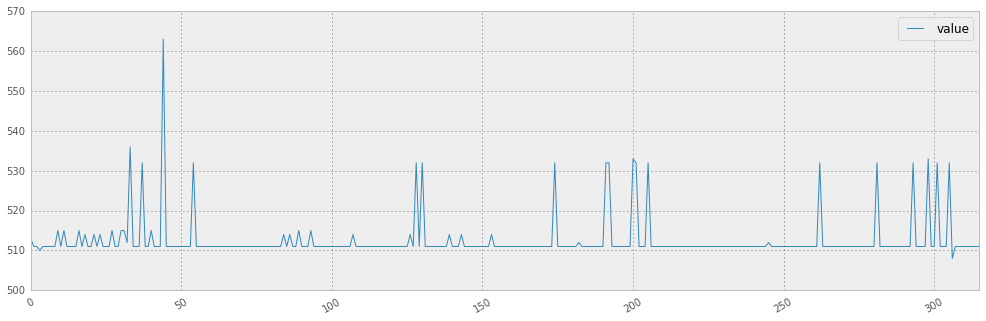

In [109]:
data = pd.read_csv('prueba06/prueba06.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

### Prueba 07

- Power: bateria 12v
    - Inicio: 12.04
    - Fin: 11.80
- Freq: 1/60 Hz (T: 1 min)
- **Cables:** 3.5 cm
- Inicio: 2016-09-14 19:18
- Fin: 2016-09-15 10:34
- Filtro pasabajos agregado: 2 capacitores (10uF electrolítico, 0.1uF cerámico)

(array([    0.,   200.,   400.,   600.,   800.,  1000.]),
 <a list of 6 Text xticklabel objects>)

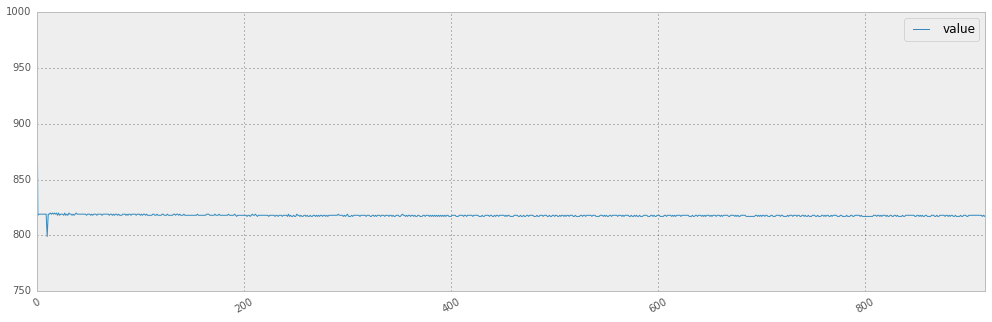

In [110]:
data = pd.read_csv('prueba07/prueba07.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [111]:
data['value'][1:].describe()

count    916.000000
mean     817.780568
std        0.899845
min      799.000000
25%      817.000000
50%      818.000000
75%      818.000000
max      820.000000
dtype: float64

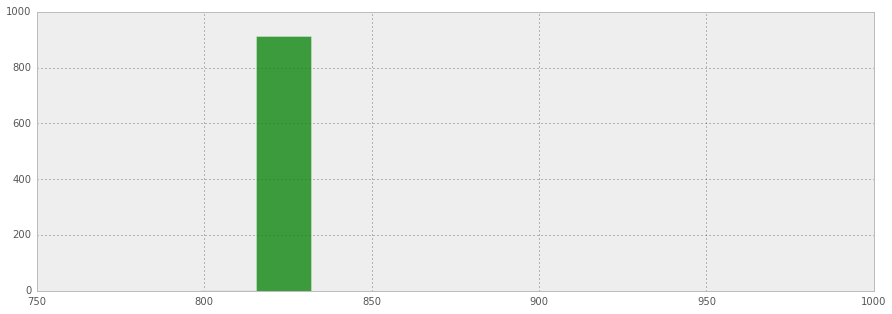

In [112]:
n, bins, patches = plt.hist(data['value'],10, facecolor='green', alpha=0.75)

### Prueba 08

- Power: bateria 12v
    - Inicio: 12.67v
    - Fin: 12.59v
- Freq: 10 Hz
- **Cables:** 3.5 cm
- Inicio: 2016-09-15 12:09
- Fin: 2016-09-15 13:23
- Filtro pasabajos agregado: 2 capacitores (10uF electrolítico, 0.1uF cerámico)

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.]), <a list of 10 Text xticklabel objects>)

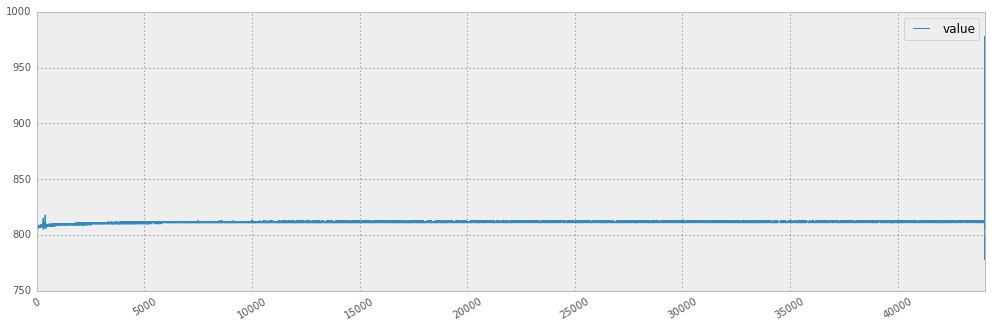

In [113]:
data = pd.read_csv('prueba08/prueba08.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [114]:
data['value'][500:-500].describe()

count    43081.000000
mean       811.642511
std          0.757281
min        808.000000
25%        811.000000
50%        812.000000
75%        812.000000
max        813.000000
dtype: float64

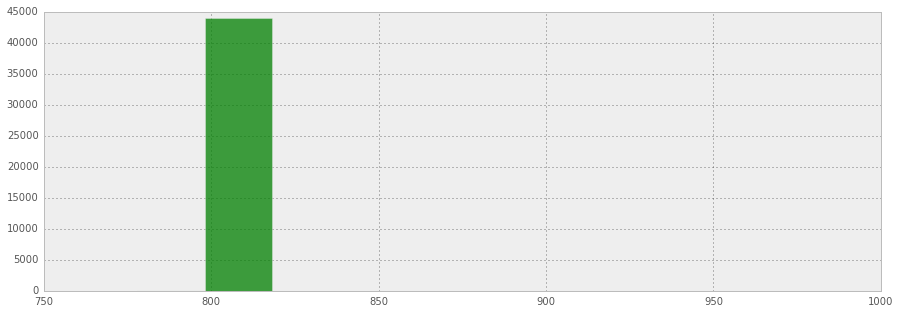

In [115]:
n, bins, patches = plt.hist(data['value'],10, facecolor='green', alpha=0.75)

### Prueba 09

- **Power:** AC x USB
- Freq: 10 Hz
- **Cables:** 3.5 cm
- Inicio: 2016-09-15 
- Fin: 2016-09-15 
- Filtro pasabajos agregado: 2 capacitores (10uF electrolítico, 0.1uF cerámico)

(array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 6 Text xticklabel objects>)

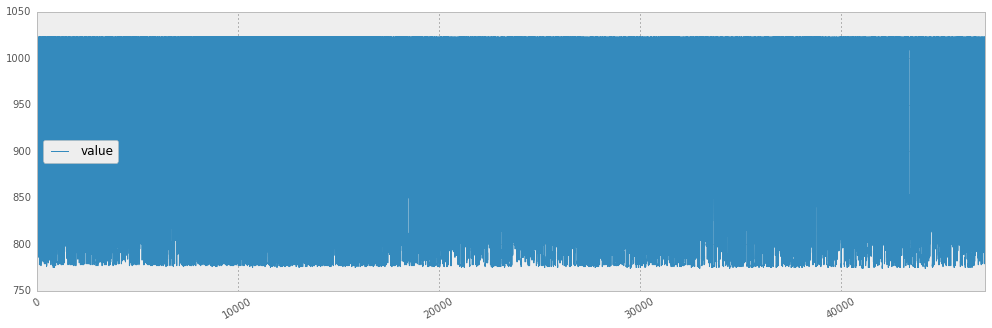

In [116]:
data = pd.read_csv('prueba09/prueba09.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [117]:
data['value'].describe()

count    47186.000000
mean       923.161086
std        105.908773
min        774.000000
25%        804.000000
50%        989.000000
75%       1023.000000
max       1023.000000
dtype: float64

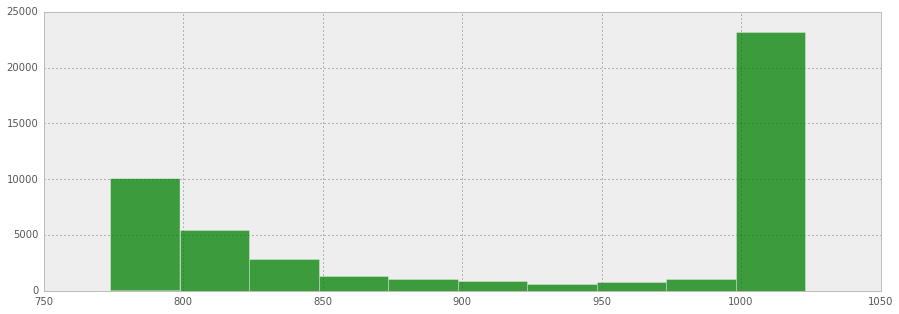

In [118]:
n, bins, patches = plt.hist(data['value'],10, facecolor='green', alpha=0.75)

### Prueba 10

- Power: bateria de 6v (se usó la función **millis()**)
- Freq: 10 Hz
- **Cables:** 3.5 cm
- Inicio: 2016-09-15 17:26
- Fin: 2016-09-15 
- Filtro pasabajos agregado: 2 capacitores (10uF electrolítico, 0.1uF cerámico)

Con esta prueba buscamos reproducir el comportamiento de la prueba 01, donde el voltaje entregado por la batería no es suficiente debido a lo requerido por el regulador interno del arduino.

(array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000.]),
 <a list of 10 Text xticklabel objects>)

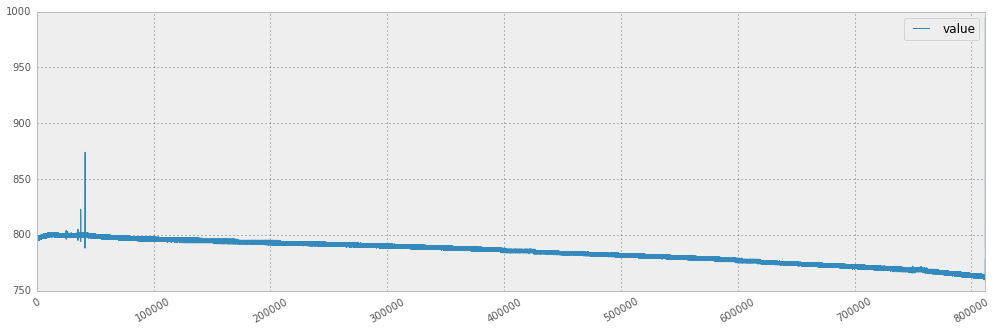

In [119]:
data = pd.read_csv('prueba10/prueba10.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [120]:
data['value'].describe()

count    811945.000000
mean        784.692197
std          10.240686
min         759.000000
25%         777.000000
50%         786.000000
75%         793.000000
max         995.000000
dtype: float64

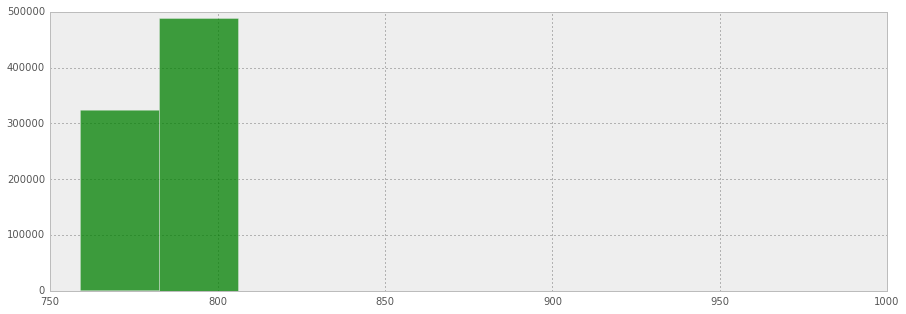

In [121]:
n, bins, patches = plt.hist(data['value'],10, facecolor='green', alpha=0.75)

### Prueba 11

- Power: bateria de 12v (se usó la función **millis()**)
- Freq: 10 Hz
- **Cables largos:** 80 cm
- Inicio: 2016-09-19 11:55
- Fin: 2016-09-19 14:25
- Filtro pasabajos agregado: 2 capacitores (10uF electrolítico, 0.1uF cerámico)

(array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000.]), <a list of 10 Text xticklabel objects>)

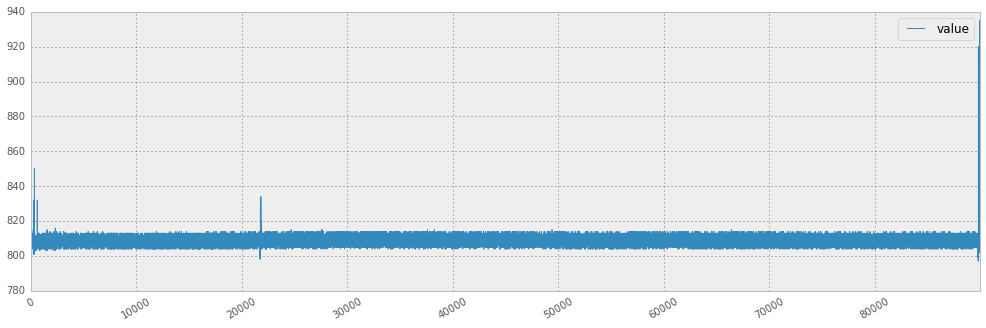

In [122]:
data = pd.read_csv('prueba11/prueba11.csv', usecols=['datetime','value'])
data.columns = ['datetime','value']

data.plot(figsize=(17,5))
plt.xticks(rotation=30)

#### Estadísticos

In [123]:
data['value'].describe()

count    89932.000000
mean       808.847440
std          2.847788
min        797.000000
25%        806.000000
50%        809.000000
75%        811.000000
max        935.000000
dtype: float64

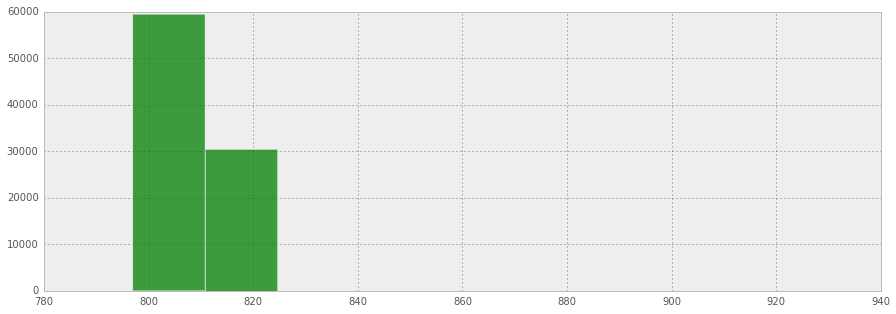

In [124]:
n, bins, patches = plt.hist(data['value'],10, facecolor='green', alpha=0.75)

### Conversión de salida cruda a voltaje

**Descripción:** el valor crudo que devuelve el sensor es un entero en el rango [0,1023]. Este rango de valores es debido al conversor AD de 10 bits que tiene Arduino (2^10 = 1024), donde 1023v es el máximo valor que equivale a 5 volts. La conversión a voltaje es val_voltaje = 5*val_crudo/1023.

Se toman como pruebas patrón las *pruebas 7 y 8* que dieron resultados estables, ambas con el filtro pasabajos y con cables cortos, una a 10Hz (T=100ms) y otra a 1/60 Hz (T=1min). 

(array([ 100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,  500.]),
 <a list of 9 Text xticklabel objects>)

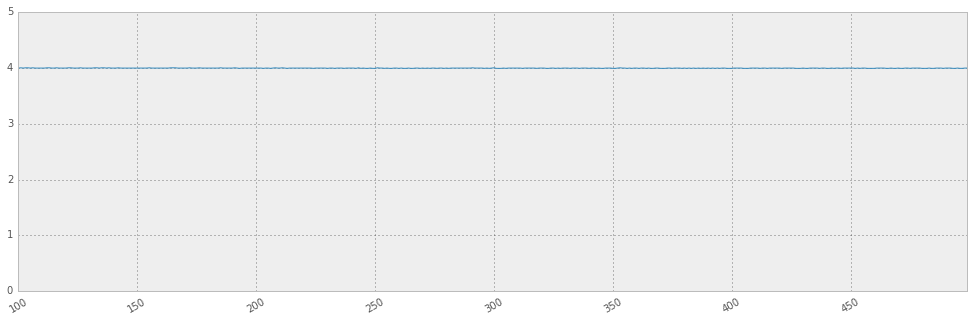

In [141]:
data7 = pd.read_csv('prueba07/prueba07.csv', usecols=['datetime','value'])
data7.columns = ['datetime','value']
data7=data7[100:500]

data7.loc[:,'volt'] = 5.0*data7['value']/1023.0

data7['volt'].plot(figsize=(17,5),ylim=(0,5))
plt.xticks(rotation=30)

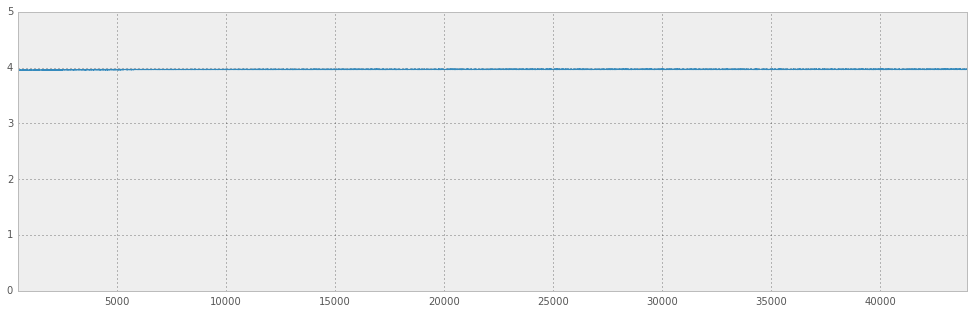

In [131]:
data8 = pd.read_csv('prueba08/prueba08.csv', usecols=['datetime','value'])
data8.columns = ['datetime','value']
data8=data8[500:-100]

data8.loc[:,'volt'] = 5.0*data8['value']/1023.0
data8['volt'].plot(figsize=(17,5),ylim=(0,5))

In [139]:
print("std prueba 7 = ", data7['volt'].describe()['std'])
print("std prueba 8 = ", data8['volt'].describe()['std'])

std prueba 7 =  0.00273336616072
std prueba 8 =  0.00369498541657


## Pruebas a distancia variable

Descripción: se prueba el sensor para diferentes distancias contra la superficie plana de una pared.

### Prueba 12

- En depósito del CENEHA
- 12v
- desde: 60cm? cada 10 cm
- sensor con filtros

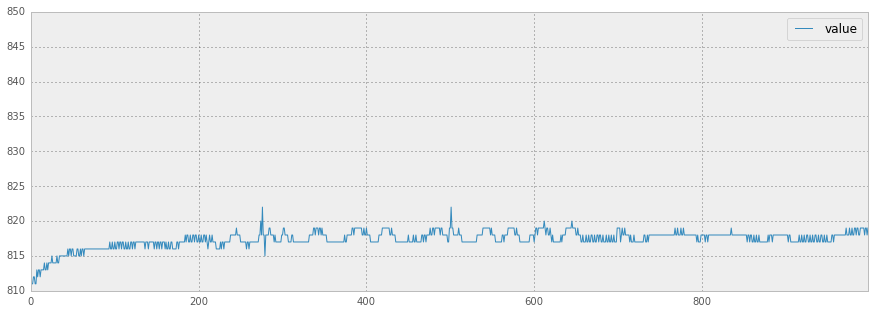

In [148]:
data12 = pd.read_csv('prueba_var_12/prueba_var_12.csv', usecols=['datetime','value'])
data12.columns = ['datetime','value']
data12.plot(ylim=(810,850));

#data12.loc[:,'volt'] = 5.0*data12['value']/1023.0
#data12['volt'].plot(figsize=(17,5),ylim=(0,5))

### Prueba 13
- Frente al CIM
- 12v
- Desde los 60cm, cada 30 cm
- sensor con filtros

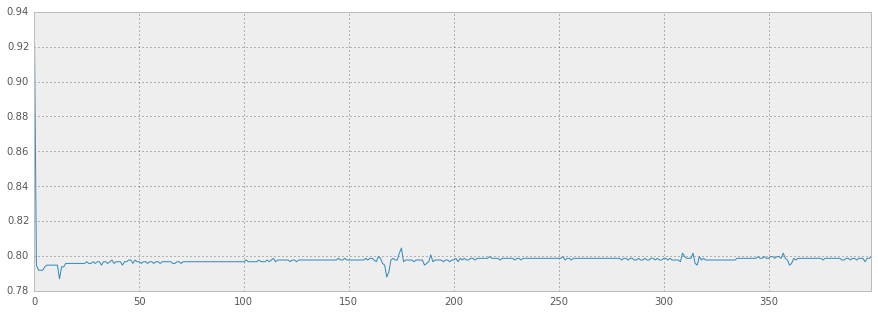

In [154]:
data13 = pd.read_csv('prueba_var_13/prueba_var_13.csv', usecols=['datetime','value'])
data13.columns = ['datetime','value']
data13.loc[:,'volt'] = data13['value']/1023.0
data13['volt'][0:400].plot();

### Prueba 14
- Frente al CIM
- 12v
- Desde los 60cm, cada 30 cm (17 distancias)
- sensor original, **sin filtro** (capacitores)
- cables de Vcc y GND trenzados

((foto))

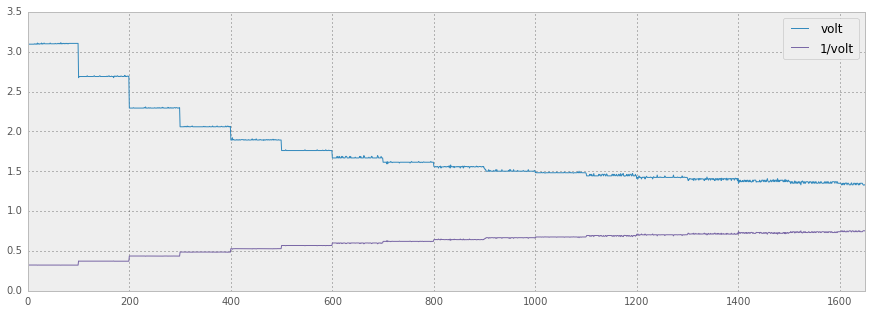

In [14]:
data14 = pd.read_csv('prueba_var_14/prueba_var_14.csv', usecols=['datetime','value'])
data14.columns = ['datetime','value']
data14.loc[:,'volt'] = 5.0*data14['value']/1023.0
data14.loc[:,'1/volt'] = 1./data14['volt']
data14[['volt','1/volt']].plot()

### Prueba 15
- Depósito del CENEHA
- 12v
- Desde los 60cm, cada 10 cm (10 distancias)
- sensor original, **sin filtro** con capacitores
- cables de Vcc y GND trenzados

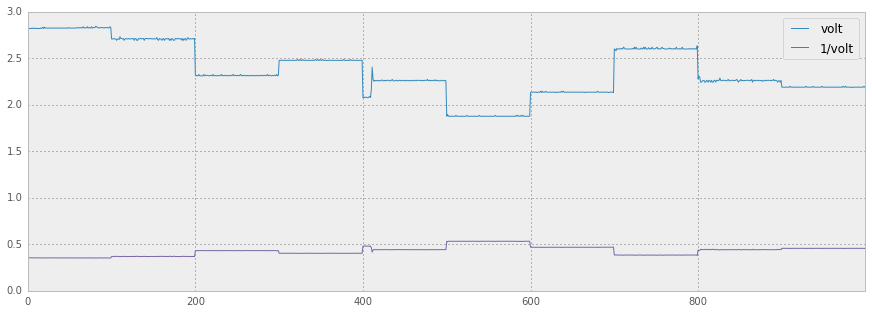

In [16]:
data15 = pd.read_csv('prueba_var_15/prueba_var_15.csv', usecols=['datetime','value'])
data15.columns = ['datetime','value']
data15.loc[:,'volt'] = 5.0*data15['value']/1023.0
data15.loc[:,'1/volt'] = 1./data15['volt']
data15[['volt','1/volt']].plot();

### Prueba 16
- Depósito del CENEHA
- 12v
- Desde los 60cm, cada 10 cm (10 distancias)
- sensor original, **sin filtro** con capacitores
- cables de Vcc y GND SIN trenzar

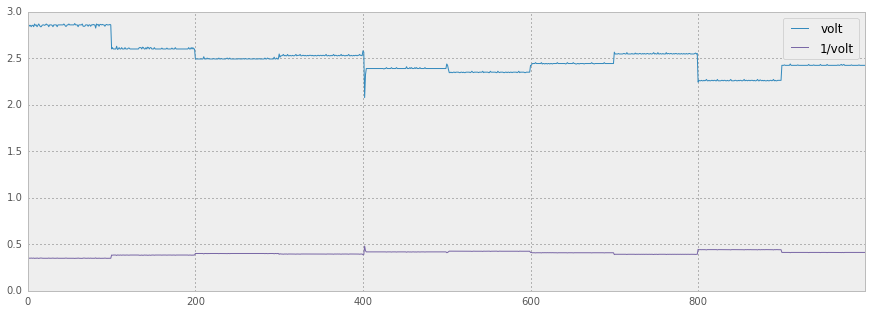

In [17]:
data16 = pd.read_csv('prueba_var_16/prueba_var_16.csv', usecols=['datetime','value'])
data16.columns = ['datetime','value']
data16.loc[:,'volt'] = 5.0*data16['value']/1023.0
data16.loc[:,'1/volt'] = 1./data16['volt']
data16[['volt','1/volt']].plot();

### Prueba 17 - distancia fija
- Depósito del CENEHA
- 12v
- Desde los 60cm, cada 10 cm (10 distancias)
- sensor original, **sin filtro** con capacitores
- cables de Vcc y GND SIN trenzar

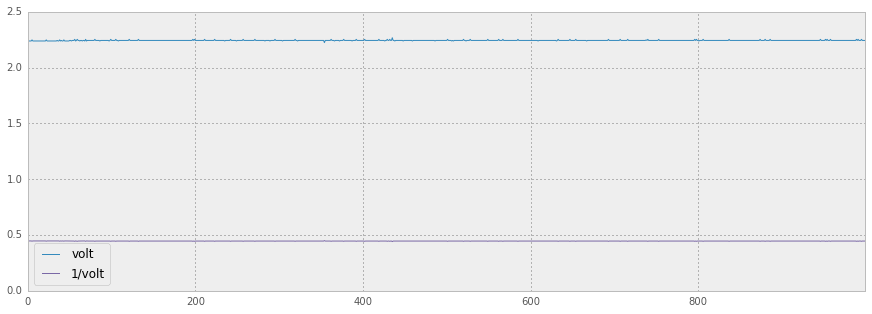

In [18]:
data17 = pd.read_csv('prueba_var_17/prueba_var_17.csv', usecols=['datetime','value'])
data17.columns = ['datetime','value']
data17.loc[:,'volt'] = 5.0*data17['value']/1023.0
data17.loc[:,'1/volt'] = 1./data17['volt']
data17[['volt','1/volt']].plot();